In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#%matplotlib inline


In [10]:
maccs = pd.read_csv('playground/JAK1_MACCS.csv')
maccs.head()
maccs = maccs.drop(['Unnamed: 0'], axis=1)
maccs.head()
y = pd.read_csv('playground/JAK1_all.csv')
label = y['Activity']
X_train, X_test, y_train, y_test = train_test_split(maccs, label, test_size = 0.2)


[[  0 661]
 [  0 722]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       661
           1       0.52      1.00      0.69       722

    accuracy                           0.52      1383
   macro avg       0.26      0.50      0.34      1383
weighted avg       0.27      0.52      0.36      1383

0.5220535068691251


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


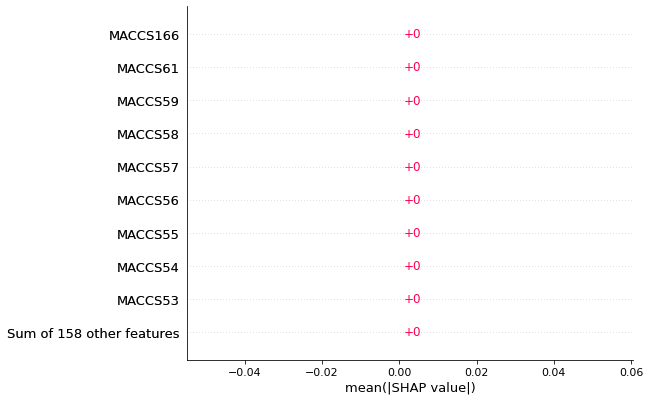

invalid value encountered in true_divide
invalid value encountered in true_divide


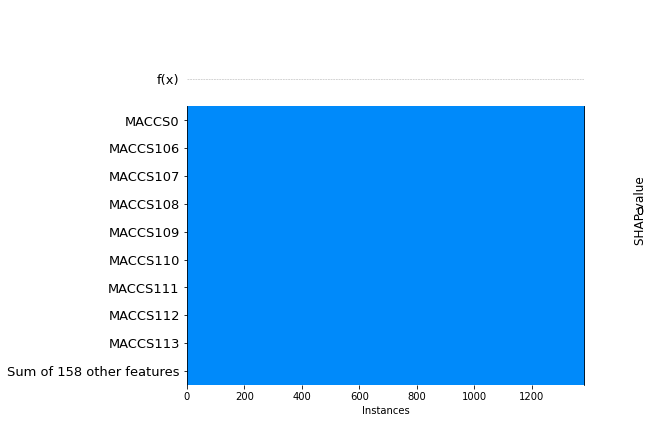

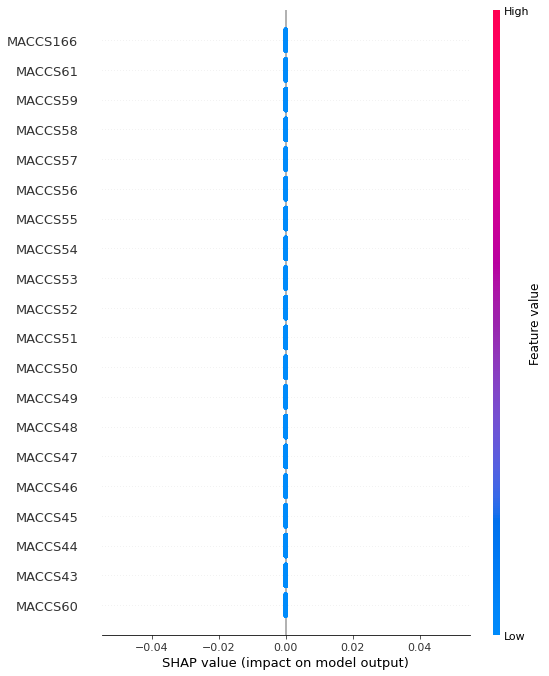

In [3]:
from XGBOOST import xgboost_batch
xgboost_batch(maccs, label)

In [11]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [12]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [22]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

It has quite a few as you can see. Even though, we achieved reasonably good results with the defaults, tuning the above parameters might result in a significant increase in performance. But before we get to tuning, let’s look at the overview of the most frequently tuned hyperparameters:

'learning_rate': also called eta, it specifies how quickly the model fits the residual errors by using additional base learners.

    * typical values: 0.01–0.2 
    
2. gamma, reg_alpha, reg_lambda: these 3 parameters specify the values for 3 types of regularization done by XGBoost - minimum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively

    * typical values for gamma: 0 - 0.5 but highly dependent on the data

    * typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data
    
3. max_depth - how deep the tree's decision nodes can go. Must be a positive integer

    * typical values: 1–10
    
4. subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting

    * typical values: 0.5–0.9
    
5. colsample_bytree- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree

    * typical values: 0.5–0.9
    
The above are the main hyperparameters people often tune. It is perfectly OK if you don’t understand them all completely (like me) but you can refer to this post which gives a thorough overview of how each of the above parameters works and how to tune them.

In [13]:
grid_cv.best_score_

0.5

In [14]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

### Based on the value, further tune if the value is on the edge of the previous list

In [18]:
[grid_cv.best_params_.get('gamma')]

[0]

In [19]:
param_grid["scale_pos_weight"] = [1]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [0]
param_grid["max_depth"] = [3]
param_grid["reg_lambda"] = [0]
param_grid["learning_rate"] = [0.1]

In [21]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(X_train, y_train)

In [6]:
data = pd.read_csv('playground/bill_authentication.csv')
X = data.drop('Class', axis=1) # Obtain all columns except Class
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [9]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[151   2]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.98      0.99      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [11]:
# Kernel SVM, non-linearly separable 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
# Polynomial kernel
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
# Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [16]:
# Sigmoid model
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 11  0]
 [ 0  8  0]
 [ 0 11  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.27      1.00      0.42         8
 Iris-virginica       0.00      0.00      0.00        11

       accuracy                           0.27        30
      macro avg       0.09      0.33      0.14        30
   weighted avg       0.07      0.27      0.11        30



/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [17]:
from svm import SVM_batch

In [18]:
SVM_batch(X, y)

For SVM model with  linear
[[ 4  0  0]
 [ 0 10  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

For SVM model with  poly
[[ 4  0  0]
 [ 0 10  0]
 [ 0  4 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.71      1.00      0.83        10
 Iris-virginica       1.00      0.75      0.86        16

       accuracy                           0.87        30
      macro avg       0.90      0.92      0.90        30
   weighted avg       0.90      0.87      0.87        30

For SVM model with  rbf
[[ 4  0  0]
 [ 0 10  0]
 [ 0  2 14]]
         

/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [61]:
maccs = pd.read_csv('playground/JAK1_MACCS.csv')
maccs.head()
maccs = maccs.drop(['Unnamed: 0'], axis=1)
maccs.head()
y = pd.read_csv('playground/JAK1_all.csv')
label = y['Activity']
from xgboost import xgboost_batch

ImportError: cannot import name 'xgboost_batch' from 'xgboost' (/Users/uranaieiko_1/opt/anaconda3/lib/python3.8/site-packages/xgboost/__init__.py)

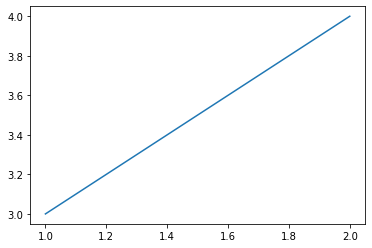

In [39]:
x = [1, 2]
y = [3, 4]
fig = plt.figure()
plt.plot(x, y)
plt.show()

In [41]:
pip uninstall matplotlib -y

Found existing installation: matplotlib 3.3.4
Uninstalling matplotlib-3.3.4:
  Successfully uninstalled matplotlib-3.3.4
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 2.8 MB/s            
     |████████████████████████████████| 930 kB 5.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


[[170   1]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       171
           1       0.99      1.00      1.00       104

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

0.9963636363636363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


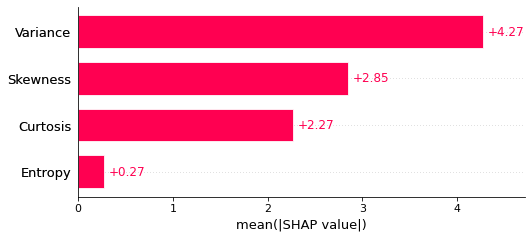

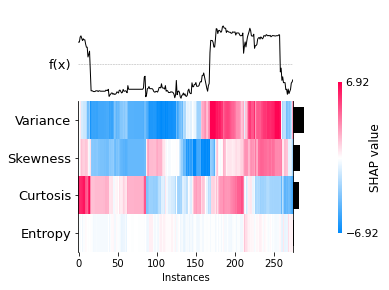

In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

data = pd.read_csv('playground/bill_authentication.csv')
X = data.drop('Class', axis=1) # Obtain all columns except Class
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=10)
shap.plots.heatmap(shap_values)
shap.summary_plot(shap_values, X_test)

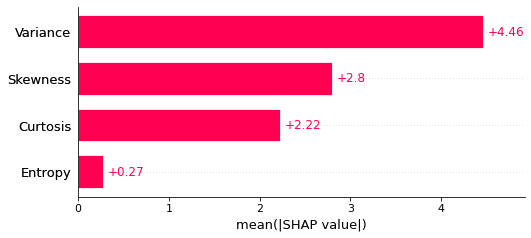

In [50]:
import shap


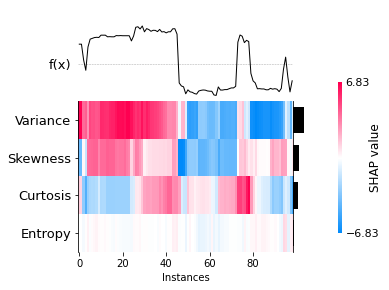

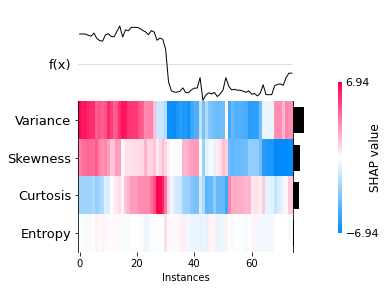

In [52]:
shap.plots.heatmap(shap_values[200:300])

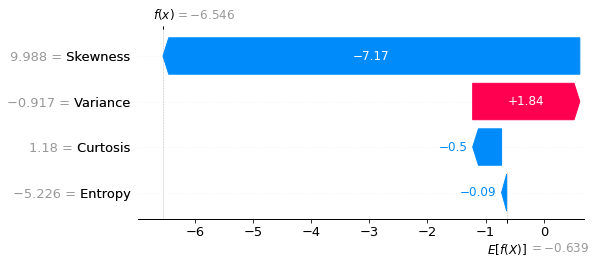

In [53]:
shap.plots.waterfall(shap_values[0]) # For the first observation

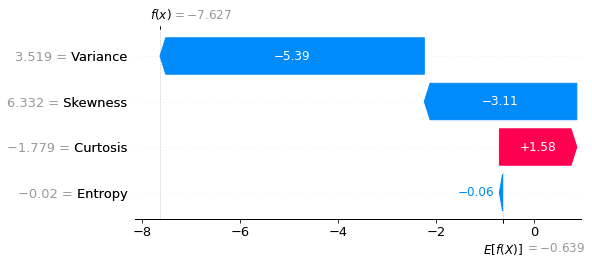

In [54]:
shap.plots.waterfall(shap_values[2]) # For the second observation

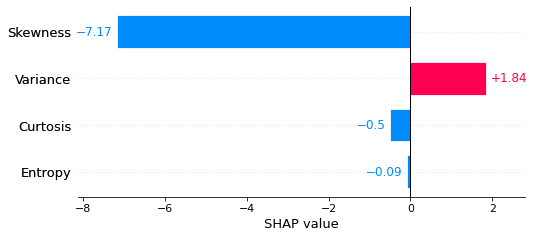

In [55]:
shap.plots.bar(shap_values[0])

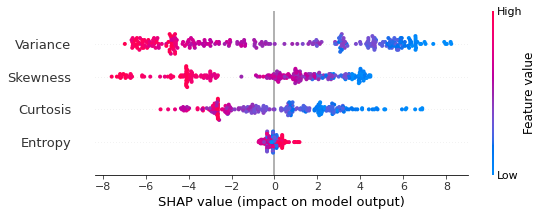